In [33]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle

### Load the data

In [34]:
wholesale_data = pd.read_csv("Wholesale customers data.csv")
wholesale_data


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### Explore the data

In [35]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Check missing data

In [36]:
print(wholesale_data.isnull().sum())


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


### Summary statistics

In [37]:
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Devide Numerical and Categorical columns

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
categorical_cols = ['Channel', 'Region']
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

X = wholesale_data[categorical_cols + numeric_cols]



### Numerical feature distribution

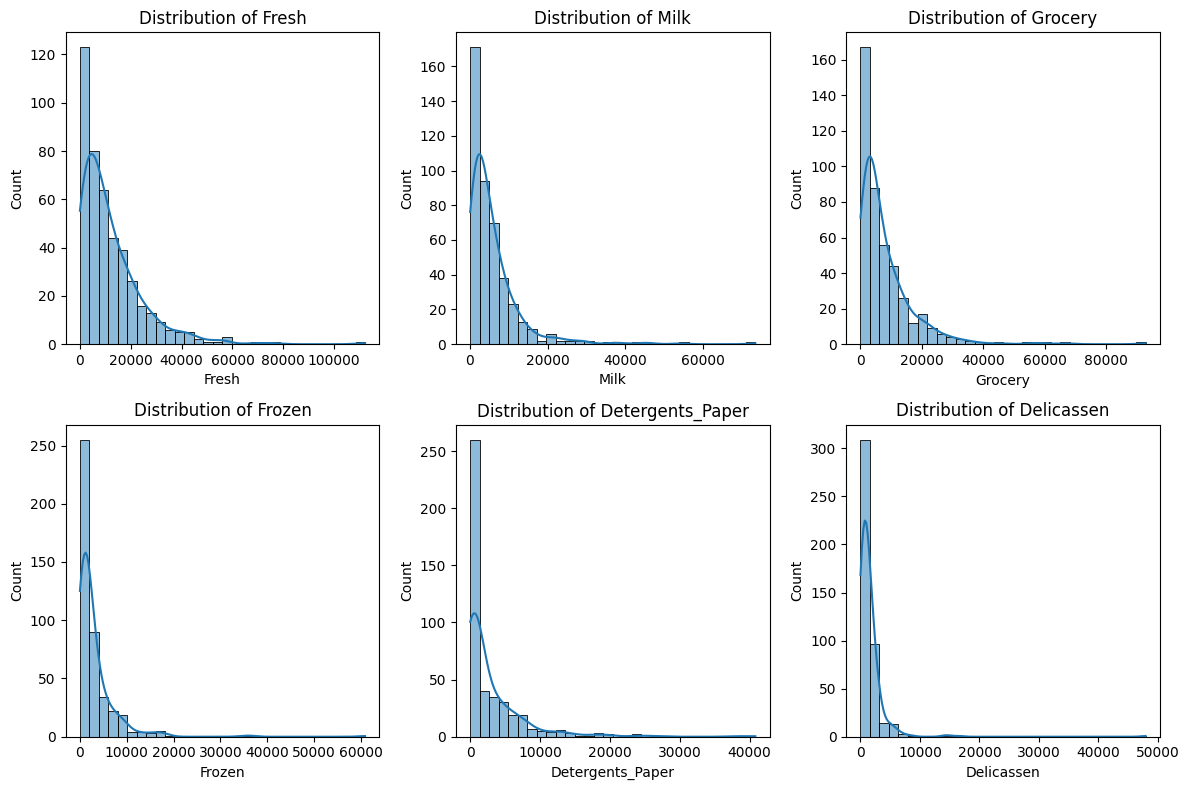

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(wholesale_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


###  Boxplots to Check Outliers

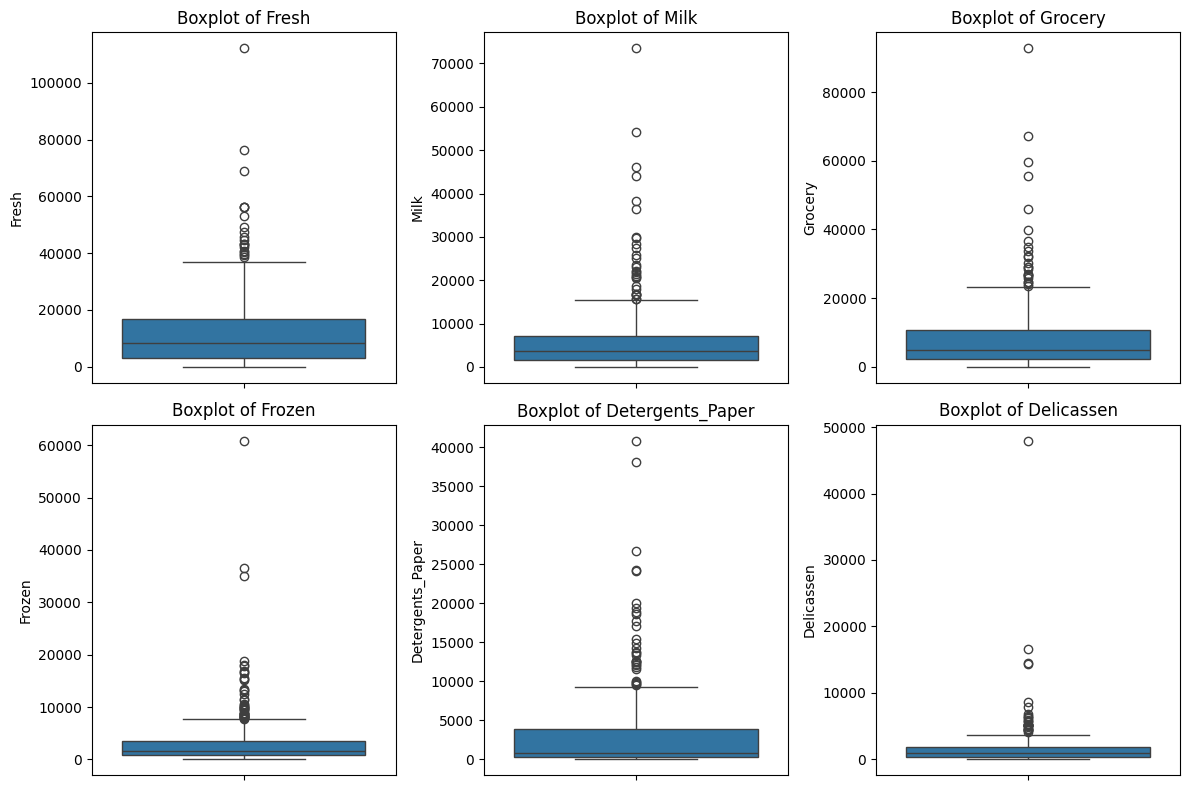

In [40]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=wholesale_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


###  Correlation Heatmap (Numeric Features)

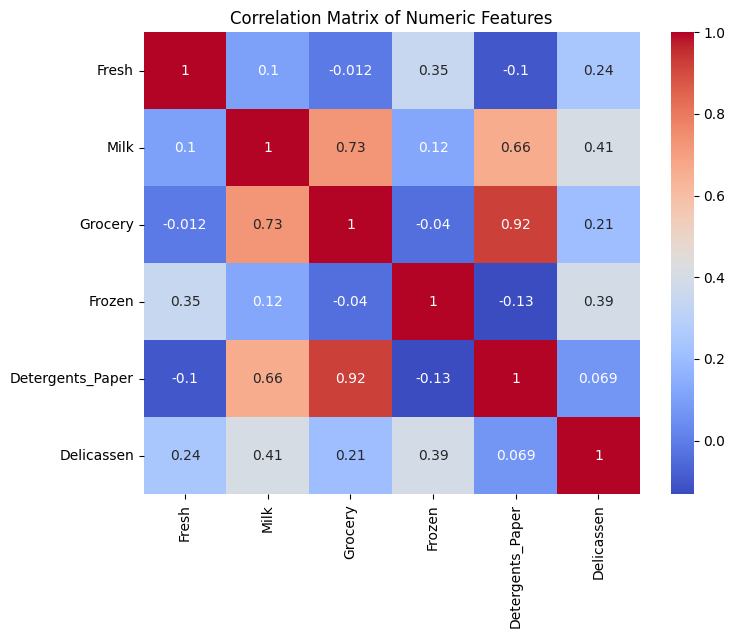

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(wholesale_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Categorical Feature Analysis

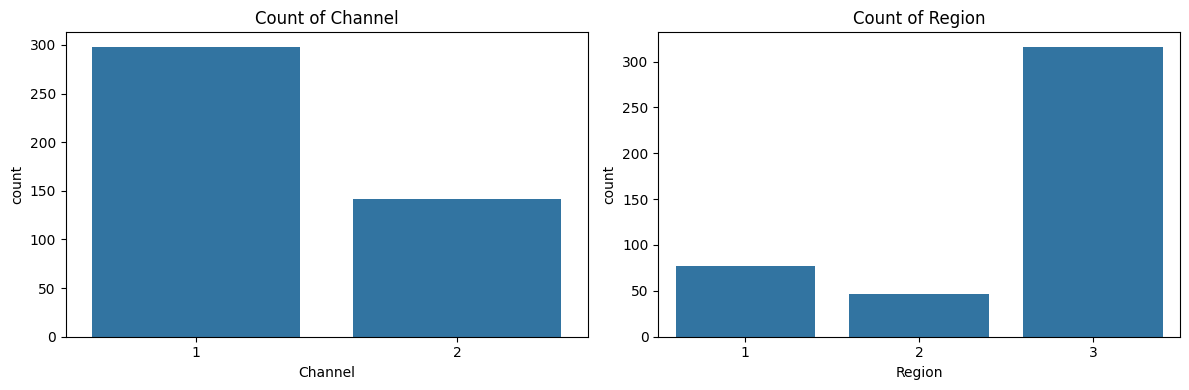

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))  # width x height

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)  # 1 row, 2 columns
    sns.countplot(x=wholesale_data[col])
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()


### Pairplot

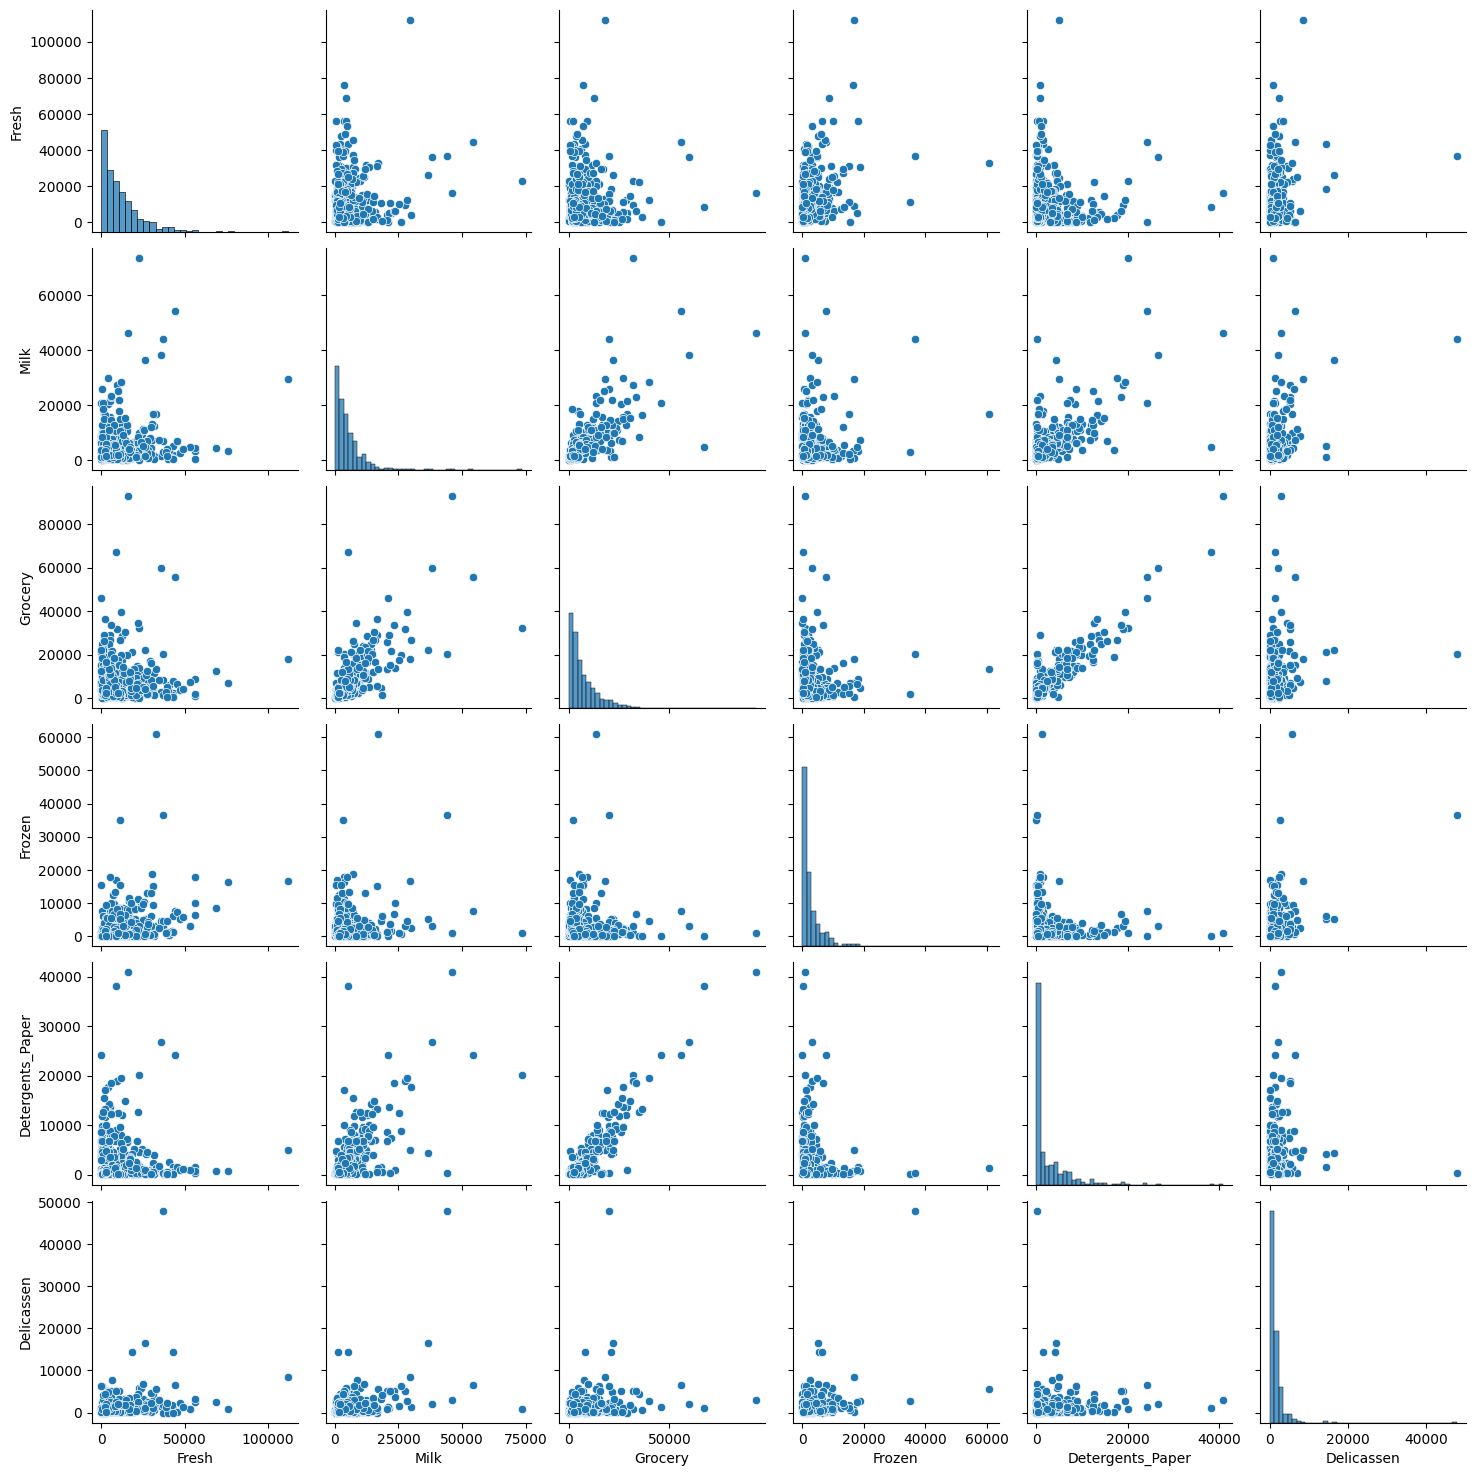

In [43]:
sns.pairplot(wholesale_data[numeric_cols])
plt.show()


### Preprocessing

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop='first'), categorical_cols),   # one-hot
        ("num", StandardScaler(), numeric_cols)                   # scaling
    ]
)


### Create cluster model by Kmeans method

In [45]:
kmeans_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("kmeans", KMeans(n_clusters=3, random_state=42))
])

kmeans_pipeline.fit(X)
labels = kmeans_pipeline.named_steps["kmeans"].labels_

wholesale_data["Cluster"] = labels
print("Clustering completed!")


Clustering completed!


### Choose k by using elbow method

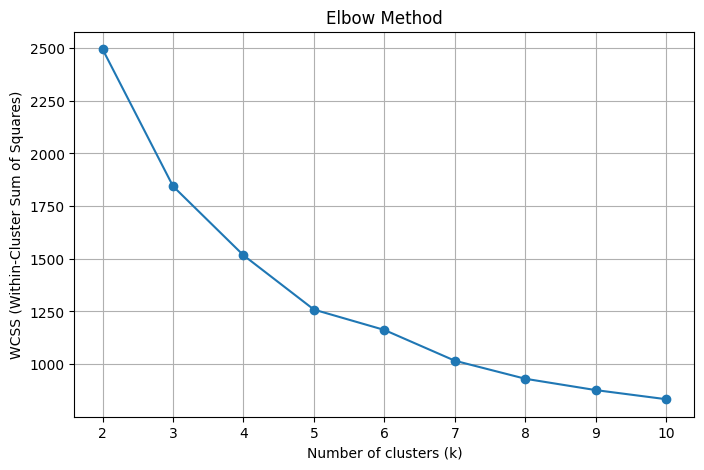

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(2, 11)  # try k from 2 to 10

# Use preprocessed data
X_processed = kmeans_pipeline.named_steps["preprocess"].transform(X)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


### Visualize the clusters

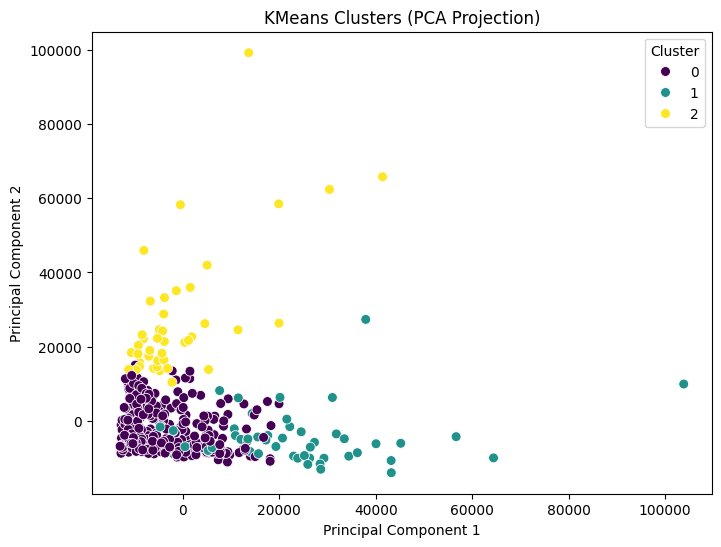

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=labels,  # cluster labels
    palette="viridis",
    s=50
)
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


### silhouette score = Higher silhouette = better cluster separation

In [48]:
from sklearn.metrics import silhouette_score

X_processed = kmeans_pipeline.named_steps["preprocess"].transform(X)
score = silhouette_score(X_processed, labels)

print("Silhouette Score:", score)


Silhouette Score: 0.41020606232471346


k = 2, Silhouette Score = 0.3167
k = 3, Silhouette Score = 0.4102
k = 4, Silhouette Score = 0.3321
k = 5, Silhouette Score = 0.3097
k = 6, Silhouette Score = 0.2877
k = 7, Silhouette Score = 0.2591
k = 8, Silhouette Score = 0.2672
k = 9, Silhouette Score = 0.2255


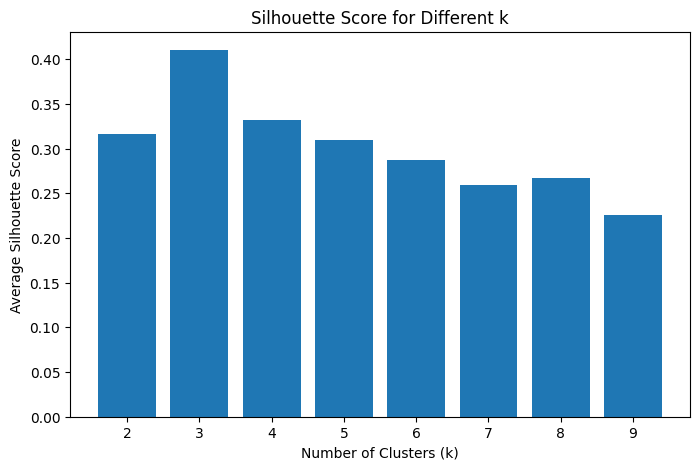

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preprocessed data
X_proc = kmeans_pipeline.named_steps["preprocess"].transform(X)

# Range of k values
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

silhouette_scores = []

# Calculate silhouette score for each k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_proc)
    silhouette_avg = silhouette_score(X_proc, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"k = {n_clusters}, Silhouette Score = {silhouette_avg:.4f}")

# ---- BAR PLOT ----
plt.figure(figsize=(8, 5))
plt.bar(range_n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.xticks(range_n_clusters)
plt.show()


 k = 2 is best by Silhouette Score.

### Dunn Index

In [50]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def dunn_index(X, labels):
    # Compute full distance matrix
    distances = euclidean_distances(X)

    unique_clusters = np.unique(labels)

    # Compute cluster diameters
    diameters = []
    for cluster in unique_clusters:
        cluster_points = X[labels == cluster]
        if len(cluster_points) > 1:
            intra_dists = euclidean_distances(cluster_points)
            diameters.append(np.max(intra_dists))
        else:
            diameters.append(0)

    max_diameter = np.max(diameters)

    # Compute inter-cluster distances
    inter_cluster_dists = []
    for i in unique_clusters:
        for j in unique_clusters:
            if i < j:
                points_i = X[labels == i]
                points_j = X[labels == j]
                dist_ij = euclidean_distances(points_i, points_j)
                inter_cluster_dists.append(np.min(dist_ij))

    min_intercluster_dist = np.min(inter_cluster_dists)

    # Dunn Index
    return min_intercluster_dist / max_diameter


In [51]:
# Preprocess X
X_processed = kmeans_pipeline.named_steps["preprocess"].transform(X)

# Fit KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_processed)
labels = kmeans.labels_

# Compute Dunn Index
dunn = dunn_index(X_processed, labels)
print("Dunn Index:", dunn)


Dunn Index: 0.017106820671514398


### Dunn Index for different k

k = 2, Dunn Index = 0.0171
k = 3, Dunn Index = 0.0171
k = 4, Dunn Index = 0.0111
k = 5, Dunn Index = 0.0128
k = 6, Dunn Index = 0.0149
k = 7, Dunn Index = 0.0146
k = 8, Dunn Index = 0.0225
k = 9, Dunn Index = 0.0212


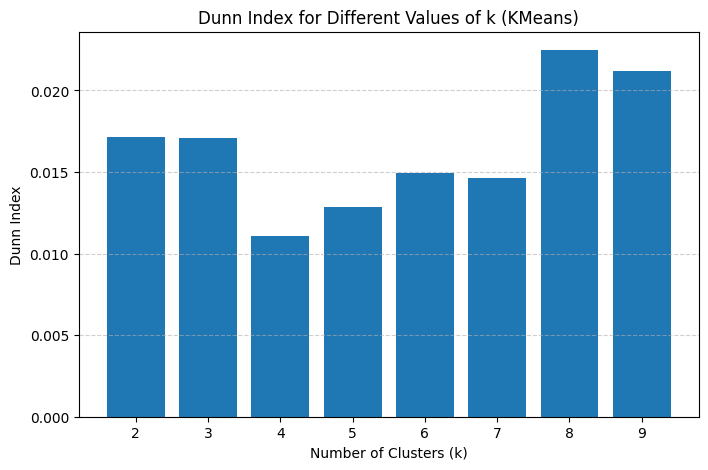

In [52]:
import matplotlib.pyplot as plt

k_values = list(range(2, 10))
dunn_scores = []

# Compute Dunn Index for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_processed)
    labels = kmeans.labels_
    dunn = dunn_index(X_processed, labels)
    dunn_scores.append(dunn)
    print(f"k = {k}, Dunn Index = {dunn:.4f}")

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(k_values, dunn_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Dunn Index")
plt.title("Dunn Index for Different Values of k (KMeans)")
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Hiararchical Clustering

##### Dendogram

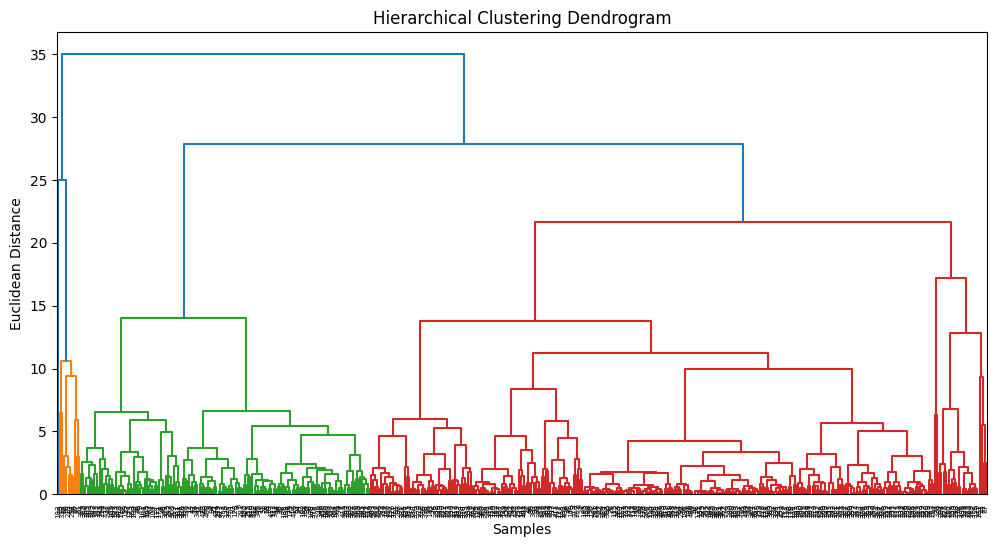

In [53]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_processed, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


In [54]:
from sklearn.cluster import AgglomerativeClustering

# Choose number of clusters based on dendrogram
n_clusters = 3

hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='euclidean',   # instead of 'affinity'
    linkage='ward'
)

labels = hc.fit_predict(X_processed)

# Add cluster labels to dataframe
wholesale_data['Hierarchical_Cluster'] = labels
print(wholesale_data['Hierarchical_Cluster'].value_counts())


Hierarchical_Cluster
1    292
2    137
0     11
Name: count, dtype: int64


### clustering for Hiararchical model

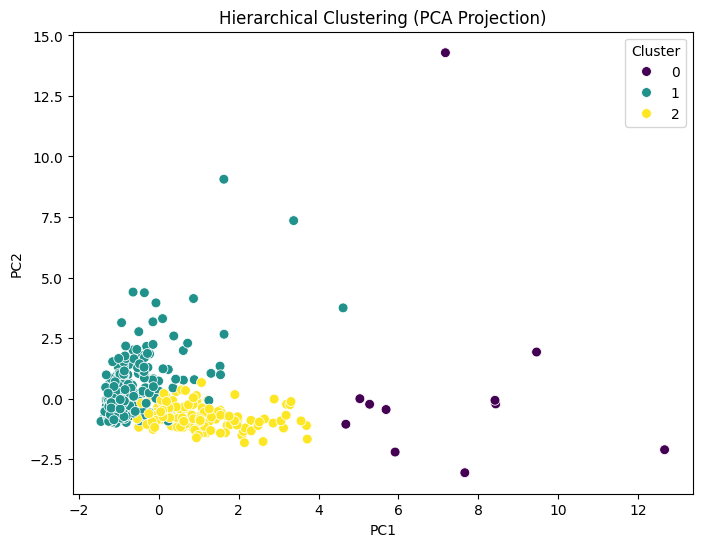

In [55]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels,
    palette="viridis",
    s=50
)
plt.title("Hierarchical Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


### Compare clustering for both model

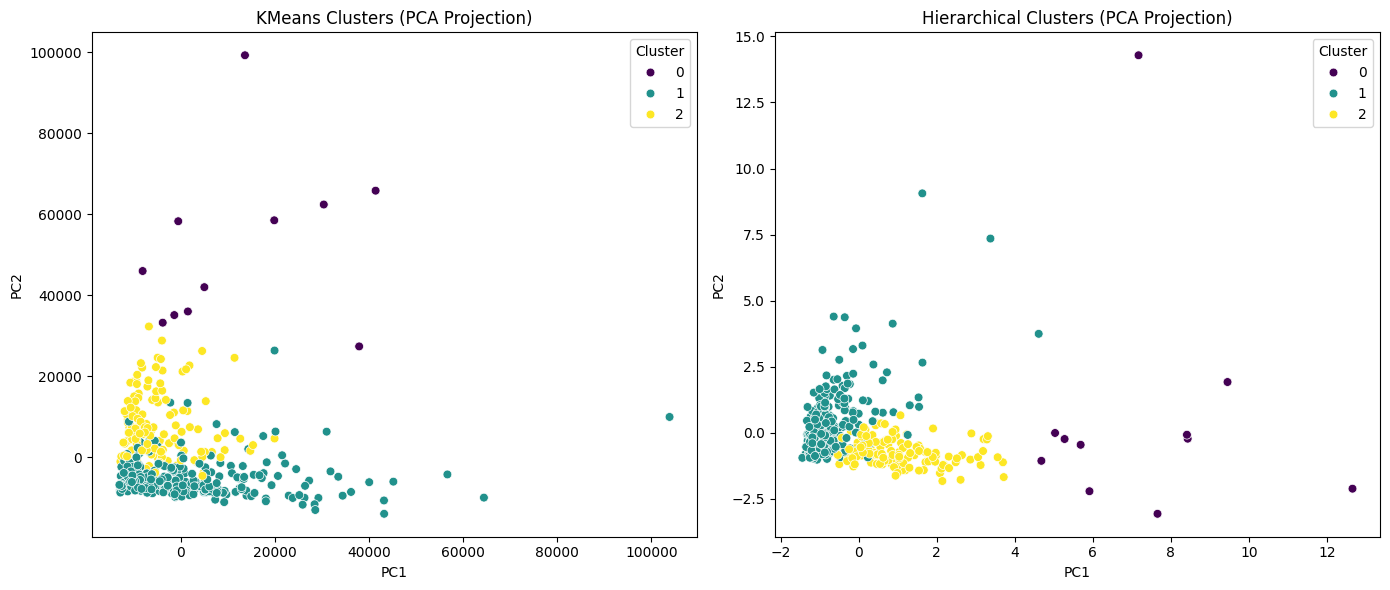

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# --- PCA for both clustering results ---
pca = PCA(n_components=2, random_state=42)

# For KMeans
X_pca_kmeans = pca.fit_transform(X)

# For Hierarchical clustering
X_pca_hier = pca.fit_transform(X_processed)

# --- Plot both side by side ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1 — KMeans
sns.scatterplot(
    ax=axes[0],
    x=X_pca_kmeans[:, 0],
    y=X_pca_kmeans[:, 1],
    hue=labels,                         # KMeans labels
    palette="viridis",
    s=40
)
axes[0].set_title("KMeans Clusters (PCA Projection)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Cluster")

# Plot 2 — Hierarchical
sns.scatterplot(
    ax=axes[1],
    x=X_pca_hier[:, 0],
    y=X_pca_hier[:, 1],
    hue=labels,                   # Hierarchical labels
    palette="viridis",
    s=40
)
axes[1].set_title("Hierarchical Clusters (PCA Projection)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()


### Silhouette Scores and Dunn Index for Hierarchical Clustering 


k=2: Silhouette Score=0.7138, Dunn Index=0.0690
k=3: Silhouette Score=0.2578, Dunn Index=0.0162
k=4: Silhouette Score=0.2620, Dunn Index=0.0260
k=5: Silhouette Score=0.2876, Dunn Index=0.0270
k=6: Silhouette Score=0.2938, Dunn Index=0.0318
k=7: Silhouette Score=0.2022, Dunn Index=0.0318
k=8: Silhouette Score=0.2052, Dunn Index=0.0318
k=9: Silhouette Score=0.2126, Dunn Index=0.0318
k=10: Silhouette Score=0.2128, Dunn Index=0.0318


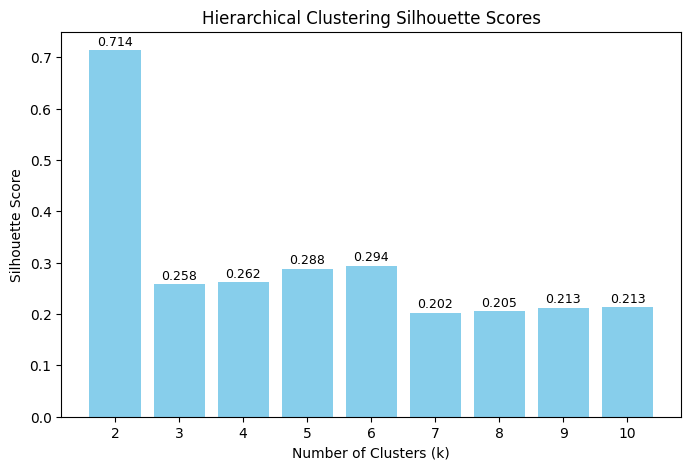

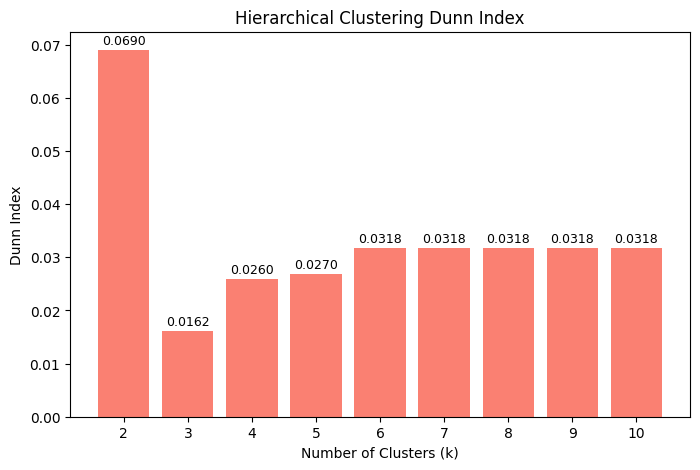

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, cdist
import numpy as np

# Function to compute Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    n_clusters = len(unique_clusters)
    
    cluster_points = [X[labels == k] for k in unique_clusters]
    
    # Minimum inter-cluster distance
    min_intercluster = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            dist = cdist(cluster_points[i], cluster_points[j], metric='euclidean')
            min_intercluster = min(min_intercluster, np.min(dist))
    
    # Maximum intra-cluster distance
    max_intracluster = 0
    for k in range(n_clusters):
        dist = pdist(cluster_points[k], metric='euclidean')
        if len(dist) > 0:
            max_intracluster = max(max_intracluster, np.max(dist))
    
    return min_intercluster / max_intracluster

# Lists to store metrics
k_values = range(2, 11)
sil_scores_hc = []
dunn_indices_hc = []

# Compute metrics for each k
for k in k_values:
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X_processed)  # X_processed = scaled + encoded data
    
    sil = silhouette_score(X_processed, labels)
    dunn = dunn_index(X_processed, labels)
    
    sil_scores_hc.append(sil)
    dunn_indices_hc.append(dunn)
    
    print(f"k={k}: Silhouette Score={sil:.4f}, Dunn Index={dunn:.4f}")

# --- Silhouette Score Plot ---
plt.figure(figsize=(8,5))
plt.bar(k_values, sil_scores_hc, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering Silhouette Scores')
plt.xticks(k_values)
for i, v in enumerate(sil_scores_hc):
    plt.text(k_values[i], v + 0.01, f"{v:.3f}", ha='center', fontsize=9)
plt.show()

# --- Dunn Index Plot ---
plt.figure(figsize=(8,5))
plt.bar(k_values, dunn_indices_hc, color='salmon')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Hierarchical Clustering Dunn Index')
plt.xticks(k_values)
for i, v in enumerate(dunn_indices_hc):
    plt.text(k_values[i], v + 0.001, f"{v:.4f}", ha='center', fontsize=9)
plt.show()


### Compare Silhouette Scores and Dunn Index for both model

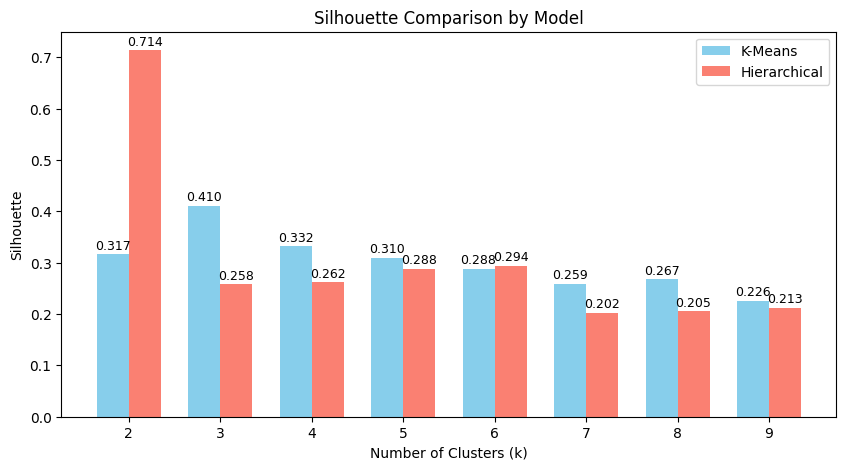

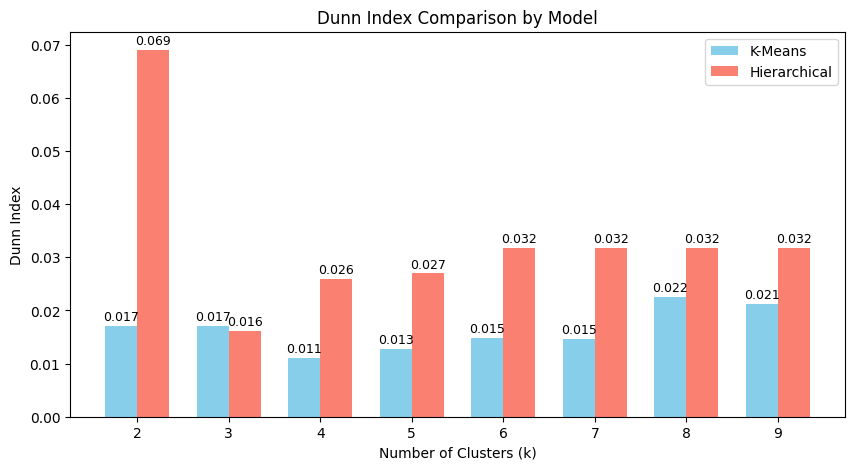

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics (replace with your actual values)
k_values = list(range(2, 10))

# Silhouette metrics
silhouette_kmeans = [0.3167, 0.4102, 0.3321, 0.3097, 0.2877, 0.2591, 0.2672, 0.2255]
silhouette_hc = [0.7138, 0.2578, 0.2620, 0.2876, 0.2938, 0.2022, 0.2052, 0.2126]

# Dunn Index metrics
dunn_kmeans = [0.0171, 0.0171, 0.0111, 0.0128, 0.0149, 0.0146, 0.0225, 0.0212]
dunn_hc = [0.0690, 0.0162, 0.0260, 0.0270, 0.0318, 0.0318, 0.0318, 0.0318]

# Width of bars
width = 0.35

# --- Silhouette Plot ---
plt.figure(figsize=(10,5))
plt.bar(np.array(k_values) - width/2, silhouette_kmeans, width, label='K-Means', color='skyblue')
plt.bar(np.array(k_values) + width/2, silhouette_hc, width, label='Hierarchical', color='salmon')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette')
plt.title('Silhouette Comparison by Model')
plt.xticks(k_values)
plt.legend()

# Annotate bars
for i, v in enumerate(silhouette_kmeans):
    plt.text(k_values[i]-width/2, v+0.01, f"{v:.3f}", ha='center', fontsize=9)
for i, v in enumerate(silhouette_hc):
    plt.text(k_values[i]+width/2, v+0.01, f"{v:.3f}", ha='center', fontsize=9)

plt.show()

# --- Dunn Index Plot ---
plt.figure(figsize=(10,5))
plt.bar(np.array(k_values) - width/2, dunn_kmeans, width, label='K-Means', color='skyblue')
plt.bar(np.array(k_values) + width/2, dunn_hc, width, label='Hierarchical', color='salmon')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index Comparison by Model')
plt.xticks(k_values)
plt.legend()

# Annotate bars
for i, v in enumerate(dunn_kmeans):
    plt.text(k_values[i]-width/2, v+0.001, f"{v:.3f}", ha='center', fontsize=9)
for i, v in enumerate(dunn_hc):
    plt.text(k_values[i]+width/2, v+0.001, f"{v:.3f}", ha='center', fontsize=9)

plt.show()


K-Means achieves its highest silhouette score at k=3, indicating moderately well-separated clusters, while Hierarchical clustering performs best at k=2, showing very clear separation. Dunn Index values are generally low for both methods, though Hierarchical clustering at k=2 has the highest value, suggesting better compactness. Overall, K-Means provides more consistent clustering across multiple k values, whereas Hierarchical is most effective with fewer clusters.